In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from data_structures import PatientData
from decoders import ConceptDecoder, SingleResultsManager
from sklearn.svm import LinearSVC

# Load patient data
p562 = PatientData(pid='562')
p563 = PatientData(pid='563')

# Set a threshold for neuron filtering
THRESHOLD = 0.1  # firing rate threshold

In [ ]:
p563_fr_neurons = p563.filter_neurons_by_fr(
    neurons=p563.neurons, 
    window=(p563.times_dict['movie_start_rel'], p563.times_dict['preSleep_recall_start_rel']), 
    threshold=THRESHOLD
)
p563_mtl_fr_neurons = p563.filter_mtl_neurons(neurons=p563_fr_neurons)

# Define characters/concepts to analyze
characters = [
    'J.Bauer',
    'C.OBrian',
    'T.Lennox',
    'A.Fayed',
    'M.OBrian',
    'N.Yassir',
    'K.Hayes',
    'B.Buchanan'
]

# Create concept pairs (traditional approach)
concept_pairs = []
for i, c1 in enumerate(characters):
    for c2 in characters[i+1:]:
        concept_pairs.append((c1, c2))

In [ ]:
concept_pairs

In [ ]:
government_group = ('J.Bauer', 'T.Lennox', 'N.Yassir', 'K.Hayes')
ctc_group = ('C.OBrian', 'M.OBrian', 'B.Buchanan')
concept_groups = [
    (government_group, ctc_group)  # Government officials vs CTU technical staff
]

check for old usage is still good

In [ ]:
manager = SingleResultsManager(
    patient_data=p563,
    concept_items=concept_pairs,  # Note: using 'concept_items' instead of 'concept_pairs'
    epoch='movie',
    classifier=LinearSVC(random_state=42),
    standardize=True,
    pseudo=False,  # Use pseudopopulations for balanced datasets
    neurons=p563_mtl_fr_neurons
)

# Run decoding with multiple iterations for robust results
num_iterations = 1
manager.run_decoding(num_iter=num_iterations)  # Using the new method name


In [ ]:
manager.plot_train_test_performance_heatmap()

now checking group decoding

In [30]:
concept_groups = [
    (
        ('A.Fayed', 'R.Wallace', 'T.Lennox', 'N.Yassir'),
        ('K.Hayes', 'M.OBrian', 'J.Bauer', 'C.Manning')
    )
]

In [31]:
group_manager = SingleResultsManager(
    patient_data=p563,
    concept_items=concept_groups,  # Note: using 'concept_items' instead of 'concept_pairs'
    epoch='movie',
    classifier=LinearSVC(random_state=42),
    standardize=True,
    pseudo=False,  # Use pseudopopulations for balanced datasets
    neurons=p563_mtl_fr_neurons
)


In [33]:
num_iterations = 1
group_manager.run_decoding(num_iter=num_iterations)  # Using the new method name


Decoding for 563:   0%|          | 0/1 [00:00<?, ?it/s]

Decoding for 563: 100%|██████████| 1/1 [00:26<00:00, 26.51s/it]


{'group_labels': ['A.Fayed+R.Wallace+T.Lennox+N.Yassir vs K.Hayes+M.OBrian+J.Bauer+C.Manning'],
 'performance': [np.float64(0.46867167919799496)],
 'error': [np.float64(0.0)]}

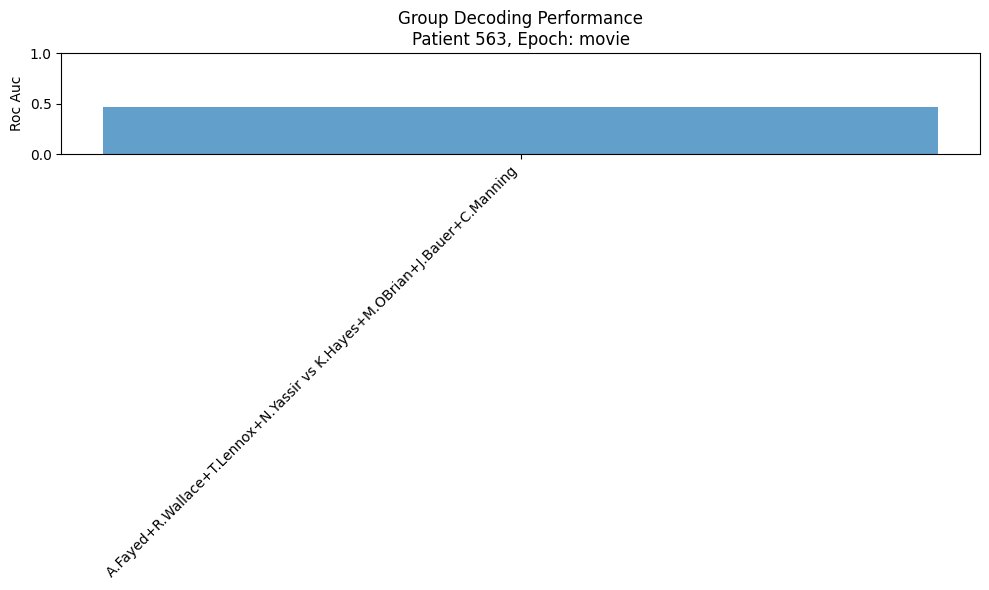

In [36]:
group_manager.plot_group_performance()